In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np
from numpy import sqrt, pi, cos, sin, log, exp, sinh
from phidl import Device, Layer, LayerSet, device_layout, Path, CrossSection, Device
from phidl import quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr
import phidl.utilities as pu
import phidl.path as pp
from phidl import quickplot as qp
import bezier
import math
import sys
import os
import math
sys.path.append(os.path.abspath(r"/Users/kamilakunes/Desktop/MJLab/Chunho_lib_240919"))
from Chunho_lib_111723_airsuspended import *
from Chunho_lib_111723_electrodes import *
from Chunho_lib_111723_heaters import *
from Chunho_lib_111723_markers import *
from Chunho_lib_111723_waveguides import *
from Chunho_lib_111723_greyscale import *

In [2]:
ls = LayerSet() # Create a blank LayerSet
ls.add_layer(name = 'label', gds_layer = 1, gds_datatype = 0,
             description = 'General label', color = 'deeppink')
ls.add_layer(name = 'marker', gds_layer = 2, gds_datatype = 0,
             description = 'EBL marker', color = 'firebrick')
ls.add_layer(name = 'grating', gds_layer = 3, gds_datatype = 0,
             description = 'bragg_grating', color = 'darkturquoise')
ls.add_layer(name = 'wg', gds_layer = 4, gds_datatype = 0,
             description = 'LN wg', color = 'dodgerblue')
ls.add_layer(name = 'ring', gds_layer = 5, gds_datatype = 0,
             description = 'LN ring', color = 'deepskyblue')
ls.add_layer(name = 'gold1', gds_layer = 6, gds_datatype = 0,
             description = 'Gold electrode', color = 'gold')
ls.add_layer(name = 'via', gds_layer = 7, gds_datatype = 0,
             description = 'hole', color = 'grey')
ls.add_layer(name = 'gold2', gds_layer = 8, gds_datatype = 0,
             description = '2nd Gold electrode', color = 'goldenrod')
ls.add_layer(name = 'nicr', gds_layer = 9, gds_datatype = 0,
             description = 'heater', color = (0.4,0.5,0.7))
ls.add_layer(name = 'test', gds_layer = 10, gds_datatype = 0,
             description = 'alignment', color = 'lime')
ls.add_layer(name = 'mc', gds_layer = 11, gds_datatype = 0,
             description = 'mode converter', color = 'mediumblue')
ls.add_layer(name = 'detch', gds_layer = 12, gds_datatype = 0,
             description = 'deep etch', color = 'orangered')

pu.write_lyp('my_layer_properties_file.lyp', layerset = ls)

layer_label =  ls['label']
layer_marker = ls['marker']
layer_grating = ls['grating']
layer_wg = ls['wg']
layer_ring = ls['ring']
layer_metal = ls['gold1']
layer_via = ls['via']
layer_metal2 = ls['gold2']
layer_heater = ls['nicr']
layer_test = ls['test']
layer_MC = ls['mc']
layer_Detch = ls['detch']

In [3]:
c0=299792458

# parameters
radius_wg = 100
wg_single = 0.8
wg_dc_bus=1
wg_pulley_bus=0.8
wg_mod = 2.0
taperlength1 = 100 #General tapering

#1st Euler racetrack
ngrp=2.247

RFFSR0=50 #optical FSR in RF frequency
Matchpath=c0/ngrp/((RFFSR0)*1e9)*1e6

total_clength=200
RT_radius=150
RT_clength=7
RT_wg_ring=1.2
RT_wg_ring2=2
Euler_ratio=0.5

#2nd Euler racetrack

RT_clength2=56
RT_wg_ring3=1.2
RT_wg_ring4=2


#ModSegElec
mod_l = 50
period=50
num_i2=mod_l//period
gap_body1=3.7
edge_width1=6.5
edge_width2=0.5
center_width1=6.5
center_width2=0.5
edge_length1=0.5
center_length1=0.5
edge_length2=45
center_length2=45

wg_taper_length=100

pad_w=150
signal_body_w=50
gap_body2=gap_body1+(edge_width1+edge_width2)*2
turn_length1=106

#Directional coupler
couplinglength1=63.5
couplinggap1=1

DCoffset1=gap_body2+signal_body_w

##MMI
MMIMid=196

MMI_wg_single=0.8
MMI_wg_taper=3.5
MMI_wg_offset=4
MMI_tlength=200
MMI_clength=MMIMid
MMI_cwidth=8

Tring_wgcp1 = np.array([
    [0.7 for x in range(1)],
    [0.8 for x in range(1)],
    [0.9 for x in range(1)],
    [0.95 for x in range(1)],
    [1.0 for x in range(1)],
    [1.1 for x in range(1)]]
)

RT_wgcp1 = np.array([
    [0.9 for x in range(1)],
    [1.0 for x in range(1)],
    [1.05 for x in range(1)],
    [1.1 for x in range(1)],
    [1.2 for x in range(1)],
    [1.3 for x in range(1)]]
)

RT_wgcp2 = np.array([
    [0.9 for x in range(1)],
    [1.0 for x in range(1)],
    [1.05 for x in range(1)],
    [1.1 for x in range(1)],
    [1.2 for x in range(1)],
    [1.3 for x in range(1)]]
)



#Facet length
facet_length1=1000
facet_width1=3

D = Device()

dev_pitch_j = 500
dev_pitch_i = 1630


marker1_x = 4000
marker1_y = 2000

# step=350
num_i = 3
num_j = 6

pattern1_center = [0,0]


In [4]:
def straight(width=3, layer = layer_wg, length=100):
            D = Device()
            D << Path().append(pp.straight(length=length)).extrude(width, layer)
            D.add_port(name = "o1", midpoint = [0,0], width = width, orientation = -180)
            D.add_port(name = "o2", midpoint = [length, 0], width = width, orientation = 0)
            return D

def taper(length=200, width1=3, width2=5, layer=layer_wg):
    D = Device()
    t = D << pg.taper(length=length, width1=width1, width2=width2, layer=layer)
    D.add_port(name = "o1", port=t.ports[1])
    D.add_port(name = "o2", port=t.ports[2])
    return D

In [5]:
left_turn1 = pp.euler(radius = radius_wg, angle = 90, p = 0.5, use_eff = True, num_pts = 10000)
right_turn1 = pp.euler(radius = radius_wg, angle = -90, p = 0.5, use_eff = True, num_pts = 10000)
cross_section_multi= CrossSection().add(width = wg_mod, offset = 0, name = 'wg', layer = layer_wg, ports = ['1','2'])
Taperpath1= pp.straight(length = (taperlength1))
cross_section_single = CrossSection().add(width = wg_pulley_bus, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
PositiveTaper1 = pp.transition(cross_section1 = cross_section_single, cross_section2 = cross_section_multi, width_type = 'linear')
NegativeTaper1 = pp.transition(cross_section1 = cross_section_multi, cross_section2 = cross_section_single, width_type = 'linear')

cross_section_facet = CrossSection().add(width = facet_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])
NegativeTaper_facet = Cross_ArbTaper(wg_input=facet_width1,wg_output=wg_pulley_bus,offset=0,layer=layer_wg)
PositiveTaper_facet = Cross_ArbTaper(wg_input=wg_pulley_bus,wg_output=facet_width1,offset=0,layer=layer_wg)

Device width: 1452.0
Device length: 522.6999999999999


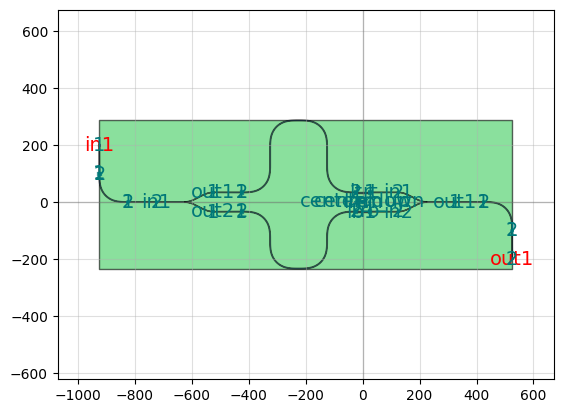

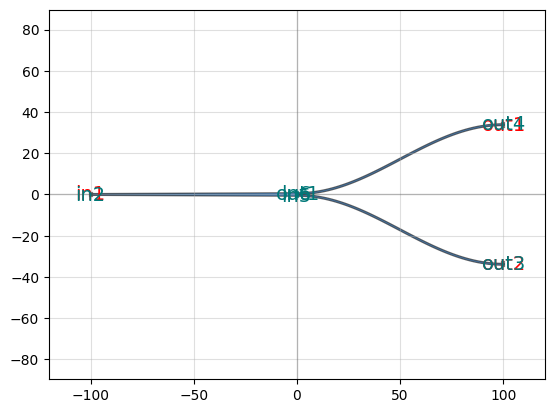

In [6]:
def Y_AsymAM():
                D = Device()
                # AM 
                AMWG1= D.add_ref(Mod_WG(wg_width= wg_mod,pad_w=pad_w,signal_body_w=signal_body_w,gap_body=gap_body2,pad_l = 0,
                                        taper_l = 0,mod_l = mod_l,layer=layer_wg))
                # AMSegElec1= D.add_ref(Mod_SegElec(pad_w=pad_w, signal_body_w=signal_body_w, gap_body=gap_body1,  period=period, num_i=num_i2,
                # layer = layer_metal, edge_width1=edge_width1, edge_width2=edge_width2, center_width1=center_width1,
                # center_width2=center_width2, edge_length1=edge_length1, center_length1=center_length1, edge_length2=edge_length2,
                #     center_length2=center_length2))
                # AMSegElec1.connect('center_up', AMWG1.ports['center_down'])

                #AM asymmetric turns path           
                AM_armtop_turn1 = D.add_ref(Path().append([
                left_turn1, pp.straight(length = turn_length1/2), right_turn1, right_turn1, pp.straight(length = turn_length1/2), left_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lt'])

                AM_armbot_turn1 = D.add_ref(Path().append([
                right_turn1, left_turn1, left_turn1, right_turn1
                ]).extrude(cross_section_multi)).connect('2', AMWG1.ports['lb'])

                # Defining tapers extruding turns
                AM_armtop_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armtop_turn1.ports['1']) # connect using top of mzi positive taper correct for l_splitter top
                AM_armbot_input1= D.add_ref(Path().append([Taperpath1]).extrude( PositiveTaper1)).connect('2', AM_armbot_turn1.ports['1']) # connect using bot of mzi
                
                AM_armtop_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rt']) # issues here
                AM_armbot_output1= D.add_ref(Path().append([Taperpath1]).extrude( NegativeTaper1)).connect('1', AMWG1.ports['rb'])
                
                Ysplit_l=D.add_ref(Ysplitter_left(wg_width1=wg_single,
                                                    splitter_length=wg_taper_length*2,
                                                    modulator_pitch=gap_body2+signal_body_w,
                                                    layer=layer_wg
                                                )).connect(port = 'out1', destination = AM_armtop_input1.ports['1']).move([0, 0])

                Ysplit_r=D.add_ref(Ysplitter_right(wg_width1=wg_single,
                                                    splitter_length=wg_taper_length*2,
                                                    modulator_pitch=gap_body2+signal_body_w,
                                                    layer=layer_wg
                                                )).connect(port = 'in1', destination = AM_armtop_output1.ports['2']).move([0, 0])
                
                # Adding turns

                AM_arm_input2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(NegativeTaper1)).connect('2', Ysplit_l.ports['in1'])

                AM_arm_input3= D.add_ref(Path().append([
                left_turn1
                ]).extrude(cross_section_multi)).connect('2', AM_arm_input2.ports['1'])

                AM_arm_input4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('2', AM_arm_input3.ports['1'])


                AM_arm_output2= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', Ysplit_r.ports['out1'])

                AM_arm_output3= D.add_ref(Path().append([
                right_turn1
                ]).extrude(cross_section_multi)).connect('1', AM_arm_output2.ports['2'])

                AM_arm_output4= D.add_ref(Path().append([
                Taperpath1
                ]).extrude(PositiveTaper1)).connect('1', AM_arm_output3.ports['2'])
            
                # text0 = 'AsymYMZI-Dev ' + str(round(ii+1, 4)) + ', ' + str(round(jj+1, 4))
                # text1 = 'Electrode gap' + str(round(gap_body1, 4))+'H' + str(round(edge_width1, 4))
                # text2 = 'Asympath ' + str(round(turn_length1, 4))+'& WGwidth ' + str(round(wg_mod, 4))
                # text3 = '^'

                # label0 = D.add_ref(pg.text(text0, size = 15, justify = 'center', layer = layer_label))
                # label0.center = [AMWG1.xmin-600, AMWG1.ymax +200] # center the red label
                # label1 = D.add_ref(pg.text(text1, size = 15, justify = 'center', layer = layer_label))
                # label1.center = [label0.center[0], label0.center[1] -30]
                # label2 = D.add_ref(pg.text(text2, size = 15, justify = 'center', layer = layer_label))
                # label2.center = [label0.center[0], label1.center[1] -30]
               
                # label7 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                # label7.center = [AMSegElec1.xmin, AMSegElec1.ymin-20]
                # label8 = D.add_ref(pg.text(text3, size = 15, justify = 'center', layer = layer_label))
                # label8.center = [AMSegElec1.xmax, AMSegElec1.ymin-20]

                D.add_port(name='in1', port =  AM_arm_input4.ports['1']) # label input and output ports
                D.add_port(name='out1', port = AM_arm_output4.ports['2'])
            
                return D

# Provides width and length of a device

J = Y_AsymAM()
bbox = J.bbox

# Calculate the width and length of the device
D_width = bbox[1][0] - bbox[0][0]  # x2 - x1
D_length = bbox[1][1] - bbox[0][1]  # y2 - y1

# Print the size of the device
print(f"Device width: {D_width}")
print(f"Device length: {D_length}")

# Add a rectangle representing the bounding box
bbox_rect = J << pg.rectangle(size=(bbox[1][0] - bbox[0][0], bbox[1][1] - bbox[0][1]))
bbox_rect.move([bbox[0][0], bbox[0][1]])  # Move bbox rectangle to the correct position


qp(J)

P = Ysplitter_left(wg_width1=wg_single, splitter_length=wg_taper_length*2, modulator_pitch=gap_body2+signal_body_w,layer=layer_wg)
qp(P)

Device width: 1452.0
Device length: 522.6999999999999


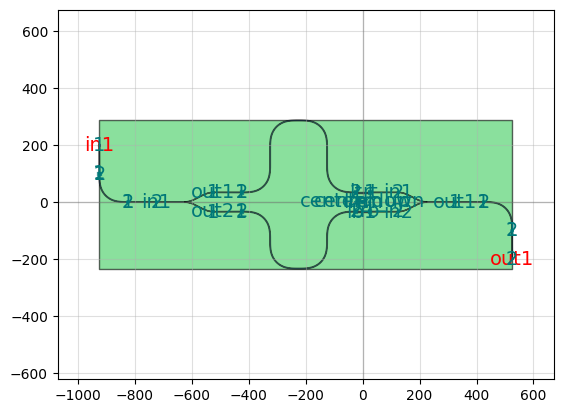

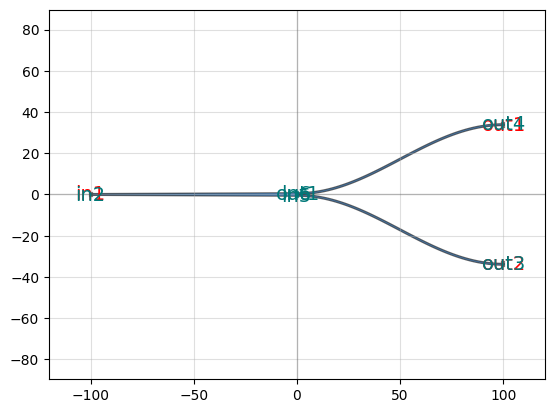

In [7]:
# Provides width and length of a device

J = Y_AsymAM()
bbox = J.bbox

# Calculate the width and length of the device
D_width = bbox[1][0] - bbox[0][0]  # x2 - x1
D_length = bbox[1][1] - bbox[0][1]  # y2 - y1

# Print the size of the device
print(f"Device width: {D_width}")
print(f"Device length: {D_length}")

# Add a rectangle representing the bounding box
bbox_rect = J << pg.rectangle(size=(bbox[1][0] - bbox[0][0], bbox[1][1] - bbox[0][1]))
bbox_rect.move([bbox[0][0], bbox[0][1]])  # Move bbox rectangle to the correct position


qp(J)

P = Ysplitter_left(wg_width1=wg_single, splitter_length=wg_taper_length*2, modulator_pitch=gap_body2+signal_body_w,layer=layer_wg)
qp(P)

In [8]:
# Adjustable parameters
ws = 30 # waveguide spacing to avoid interctions (um)
mrow = 4
mcol = 5

6173.8


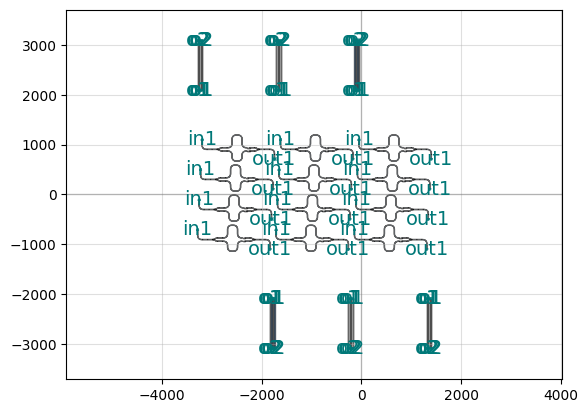

In [27]:
# Function to create a 4x4 matrix of Y_AsymAM devices


def create_chip_matrix(row,col):
    # Initialize the main device
    D = Device('Y_AsymAM_Chip')

    dev_pitch_i = D_width+(ws*row)  # Horizontal spacing
    dev_pitch_j = D_length+ws+50  # Vertical spacing
    
    # Loop to create a nxm matrix of Y_AsymAM devices
    for ii in range(col):

        for jj in range(row):
            
            Mod1 = D.add_ref(Y_AsymAM())  # Add the MMI AsymAM device to the chip
            
            # Position the device in the grid
            step_x = (-(4 - 1)/2 + ii) * dev_pitch_i + ws*jj
            # print(step_x)
            step_y = (-(4 - 1)/2 + jj) * dev_pitch_j
            Mod1.move([step_x, step_y])  # Move the device to its position in the grid

            
            
            # str = D << straight(width=2, layer = layer_wg, length=500+dev_pitch_j*(row-1-jj)) # output waveguides
            # str.connect('o2', destination=Mod1.ports['in1'])

            # str = D << straight(width=2, layer = layer_wg, length=500+dev_pitch_j*jj) # input waveguides
            # str.connect('o1', destination=Mod1.ports['out1'])


        #########################


            # Retrieve the starting point and orientation from the existing device's port
            start_in_port = Mod1.ports['in1']
            x1, y1 = start_in_port.midpoint  # Starting point (x1, y1)

            # Parameters for the new waveguide
            vertical_offset = ((row*522.7+(row-1)+80)/2 + 1000)
            waveguide_length = 1000  # Length of the new waveguide

            # Calculate the new waveguide's position based on the vertical offset
            facet_top_x = x1  # Keep the x-position the same as the port's x
            facet_top_y = vertical_offset  # Offset the y-position

            # Create the new waveguide (not connected to the port)
            facet_top = straight(width=2, layer = layer_wg, length=waveguide_length)
            facet_top_ref = D.add_ref(facet_top)
            facet_top_ref.rotate(angle=90)
            facet_top_ref.move((facet_top_x, facet_top_y))

            # Retrieve the starting point and orientation from the existing device's port
            start_out_port = Mod1.ports['out1']
            x1, y1 = start_out_port.midpoint  # Starting point (x1, y1)

            # Parameters for the new waveguide
            vertical_offset = ((row*522.7+(row-1)+80)/2 + 1000)

            # Calculate the new waveguide's position based on the vertical offset
            facet_bot_x = x1  # Keep the x-position the same as the port's x
            facet_bot_y = -vertical_offset  # Offset the y-position

            # Create the new waveguide (not connected to the port)
            facet_bot = straight(width=2, layer = layer_wg, length=waveguide_length)
            facet_bot_ref = D.add_ref(facet_bot)
            facet_bot_ref.rotate(angle=-90)
            facet_bot_ref.move((facet_bot_x, facet_bot_y))

    # D.center=[0,0]



    return D

    # Export the device to a GDS file
    # gds_file = 'Y_AsymAM_Chip.gds'
    # D.write_gds(gds_file)

# Run the function to create the matrix
D = create_chip_matrix(mrow,3)

# Get the bounding box of the device
bbox = D.bbox

# Calculate the width and length of the device
array_sizex = bbox[1][0] - bbox[0][0]  # x2 - x1
array_sizey = bbox[1][1] - bbox[0][1]  # y2 - y1

print(array_sizey)
qp(D)


In [10]:
#testrings
Tring_radius=150
Tring_bend_radius=100
Tring_wg_single=0.8
Tring_wg_ring1=1.2
Tring_wg_ring2=1.6
Tring_step=30
Tring_step2=65
Tring_dev_pitch_j2=500
Tring_width = 412
Tring_xoffset1=-array_sizex/2 - Tring_width - ws


D6 = Device()

num_l=6
ll=0
for ll in range(0,num_l):
    

        #Test rings
        ring1 = D6.add_ref(ring_circle(radius = Tring_radius, width = Tring_wg_ring1, angle_resolution = 0.5, layer = layer_ring))
        ring1.move([Tring_step*(ll)+Tring_xoffset1, (-(num_l - 1)/2+ll)*Tring_dev_pitch_j2])

        left_turn2 = pp.euler(radius = Tring_bend_radius, angle = 90, p = 0.5, use_eff = True)
        right_turn2 = pp.euler(radius = Tring_bend_radius, angle = -90, p = 0.5, use_eff = True)
        cross_section_single = CrossSection().add(width = Tring_wg_single, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])

        coupler1 = D6.add_ref(coupler_straight(width = Tring_wg_single, length = Tring_radius*1.5, layer = layer_wg)).connect(port = 'coup', destination = ring1.ports['l']).move([-Tring_wgcp1[ll,0],0])
        cross_section_single2 = CrossSection().add(width = facet_width1, offset = 0,  name = 'wg', layer = layer_wg, ports = ['1','2'])

        wg_dev_out = D6.add_ref(Path().append([
                left_turn2, 
                pp.straight(length = Hpath1),
                right_turn2,
                ]).extrude(cross_section_single)).connect('1', coupler1.ports['1'])

        # wg_couple_in_end1 = D6.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        # wg_couple_in_end1.rotate(-90)
        # wg_couple_in_end1.center = [ coupler1.xmin+Tring_wg_single/2, chip_sizey/2-facet_length1/2]

        # wg_couple_in_end11 = D6.add_ref(Path().append([
        # Taperpath1
        # ]).extrude(NegativeTaper_facet)).connect('1', wg_couple_in_end1.ports['2'])

        # D6.add_ref(pr.route_smooth(wg_couple_in_end11.ports['2'], coupler1.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))

        # wg_couple_out_end1 = D6.add_ref(Path().append([pp.straight(length = facet_length1)]).extrude(cross_section_facet))
        # wg_couple_out_end1.rotate(-90)
        # wg_couple_out_end1.center = [ wg_dev_out.xmax-Tring_wg_single/2, -chip_sizey/2+facet_length1/2]
                
        # wg_couple_out_end11 = D6.add_ref(Path().append([
        # Taperpath1
        # ]).extrude(PositiveTaper_facet)).connect('2', wg_couple_out_end1.ports['1'])

        # D6.add_ref(pr.route_smooth(wg_couple_out_end11.ports['1'], wg_dev_out.ports['2'], path_type = 'straight', width_type = 'straight', num_path_pts = 99, layer = layer_wg))
                
        #Text
        # text0 = 'TRing ' + str(round(ii+1, 4)) + ', ' + str(round(ll+1, 4))
        # text3 = 'wgcp ' + str(round(Tring_wgcp1[ll,0], 4)) + ' , radius ' + str(round(Tring_radius, 4))
        # text4 = 'BWidth ' + str(round(Tring_wg_single, 4)) + ' , RWidth' + str(round(Tring_wg_ring1, 4))

        # label_ring0 = D6.add_ref(pg.text(text0, size = 7, justify = 'center', layer = layer_label))
        # label_ring0.center = [ring1.center[0], ring1.center[1] + 30]
        # label_ring1 = D6.add_ref(pg.text(text3, size = 7, justify = 'center', layer = layer_label))
        # label_ring1.center = [label_ring0.center[0], label_ring0.center[1] -20]
        # label_ring2 = D6.add_ref(pg.text(text4, size = 7, justify = 'center', layer = layer_label))
        # label_ring2.center = [label_ring0.center[0], label_ring0.center[1] -40]


        # text_wg_1 = str(round(ii+1, 4)) + ',' + str(round(ll+1, 4))
        # text_wg_2 = '<'   # label for center of the feed waveguide
        # text_wg_3 = '<<<'  # end of feed waveguide on the edge

        # label_wg_in = D6.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
        # label_wg_in.center = [wg_couple_in_end1.center[0] + Tring_step/2 ,wg_couple_in_end1.ymax - facet_length1]
        # label_wg_in_2 = D6.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
        # label_wg_in_2.center = [wg_couple_in_end1.center[0] + Tring_step/2 ,wg_couple_in_end1.ymax - facet_length1-20]

        # label_wg_out = D6.add_ref(pg.text(text_wg_1, size = 7, justify = 'center', layer = layer_label))
        # label_wg_out.center = [wg_couple_out_end1.center[0] + Tring_step/2 ,wg_couple_out_end1.ymin +facet_length1]
        # label_wg_out_2 = D6.add_ref(pg.text(text_wg_2, size = 7, justify = 'center', layer = layer_label))
        # label_wg_out_2.center = [wg_couple_out_end1.center[0] + Tring_step/2 ,wg_couple_out_end1.ymin + facet_length1-20]

D.add_ref(D6) 
D.center=(0,0)
print(Hpath1)
qp(D)

NameError: name 'Hpath1' is not defined

Device width: 5138.1
Device length: 3208.1000000000004


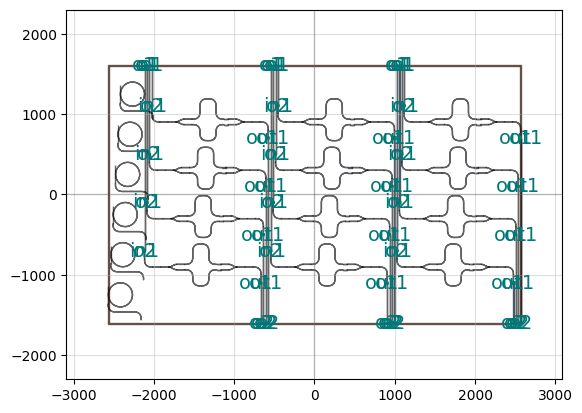

In [33]:
# Get the bounding box of the device
bbox = D.bbox

# Calculate the width and length of the device
chip_sizex = bbox[1][0] - bbox[0][0]  # x2 - x1
chip_sizey = bbox[1][1] - bbox[0][1]  # y2 - y1

# Print the size of the device
print(f"Device width: {chip_sizex}")
print(f"Device length: {chip_sizey}")

#Deep etching mask
Etchwidth=10
Rec = Device()
Detchmask1= Rec.add_ref(pg.rectangle(size = (chip_sizex-Etchwidth, chip_sizey-Etchwidth), layer = layer_Detch))
Detchmask2 = D.add_ref(pg.outline(Rec, distance = Etchwidth, precision = 1e-6, layer = layer_Detch))
Detchmask2.center=[0,0]

qp(D)

In [ ]:
# device name
dev_name = 'Kamila'

file_name = dev_name +'.gds'
label_dev = D.add_ref(pg.text(file_name, size = 150, justify = 'center', layer = layer_label))
label_dev.rotate(-90)
label_dev.center = [chip_sizex/2*0.8,0]

D.flatten()
pattern_area = D.area()*10**-6 # unit mm^2
#%%
D.write_gds(file_name,
             unit = 1e-6, precision = 1e-10)
print('GDS saved')
print('pattern area = %.3f mm^2' % pattern_area)
print('Racetrack path = %.3f um' % (Matchpath))
print('GDS saved')

GDS saved
pattern area = 0.378 mm^2
Racetrack path = 2668.380 um
GDS saved


/Users/kamilakunes/Desktop/MJLab/Phase Change Modulator/ModCAD/.venv/lib/python3.10/site-packages/phidl/device_layout.py:1555: UserWarning: [GDSPY] Polygons with more than 8190 are not supported by the official GDSII specification.  This GDSII file might not be compatible with all readers.
  lib.write_gds(filename, cells=all_cells)
